In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import secrets

In [3]:
df=pd.read_csv('mushrooms.csv')
df=df.dropna(how='any')

In [4]:
b=list (df['stalk-root'].unique())
b

['e', 'c', 'b', 'r', '?']

In [5]:
df['stalk-root']=df['stalk-root'].replace('?',(secrets.choice(b)))
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,r,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,r,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,r,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,r,s,k,w,w,p,w,o,e,w,v,l


In [6]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
df['class']=le1.fit_transform(df['class'])
df['cap-shape']=le1.fit_transform(df['cap-shape'])
df['cap-surface']=le1.fit_transform(df['cap-surface'])
df['cap-color']=le1.fit_transform(df['cap-color'])
df['bruises']=le1.fit_transform(df['bruises'])
df['odor']=le1.fit_transform(df['odor'])
df['gill-attachment']=le1.fit_transform(df['gill-attachment'])
df['gill-spacing']=le1.fit_transform(df['gill-spacing'])
df['gill-size']=le1.fit_transform(df['gill-size'])
df['gill-color']=le1.fit_transform(df['gill-color'])
df['stalk-shape']=le1.fit_transform(df['stalk-shape'])
df['stalk-root']=le1.fit_transform(df['stalk-root'])
df['stalk-surface-above-ring']=le1.fit_transform(df['stalk-surface-above-ring'])
df['stalk-surface-below-ring']=le1.fit_transform(df['stalk-surface-below-ring'])
df['stalk-color-above-ring']=le1.fit_transform(df['stalk-color-above-ring'])
df['stalk-color-below-ring']=le1.fit_transform(df['stalk-color-below-ring'])
df['veil-type']=le1.fit_transform(df['veil-type'])
df['veil-color']=le1.fit_transform(df['veil-color'])
df['ring-number']=le1.fit_transform(df['ring-number'])
df['ring-type']=le1.fit_transform(df['ring-type'])
df['spore-print-color']=le1.fit_transform(df['spore-print-color'])
df['population']=le1.fit_transform(df['population'])
df['habitat']=le2.fit_transform(df['habitat'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,3,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,3,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,3,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,3,2,1,7,7,0,2,1,0,7,4,2


In [7]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
y=y.reshape(len(y),1)
y

array([[5],
       [1],
       [3],
       ...,
       [2],
       [2],
       [2]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
import tensorflow as tf

In [11]:
y_train = tf.keras.utils.to_categorical(y_train,7)
y_test = tf.keras.utils.to_categorical(y_test,7)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [14]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))
ann.add(tf.keras.layers.Dense(units=90, activation='relu'))
ann.add(tf.keras.layers.Dense(units=7,activation='softmax'))

In [15]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history=ann.fit(X_train, y_train, batch_size=15, epochs=150)
ann.save("MC.h5")

Epoch 1/150
407/407 [==============================] - 1s 1ms/step - loss: 1.2143 - accuracy: 0.5040
Epoch 2/150
407/407 [==============================] - 1s 1ms/step - loss: 0.7152 - accuracy: 0.6369
Epoch 3/150
407/407 [==============================] - 1s 1ms/step - loss: 0.6255 - accuracy: 0.6628
Epoch 4/150
407/407 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6655
Epoch 5/150
407/407 [==============================] - 1s 1ms/step - loss: 0.5804 - accuracy: 0.6714
Epoch 6/150
407/407 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.6559
Epoch 7/150
407/407 [==============================] - 1s 1ms/step - loss: 0.5687 - accuracy: 0.6636
Epoch 8/150
407/407 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.6836
Epoch 9/150
407/407 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.6766
Epoch 10/150
407/407 [==============================] - 1s 1ms/step - loss: 0.5408 - accura

Saved Model & Graph to disk


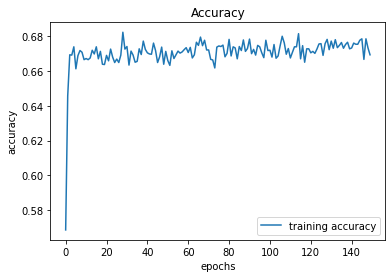

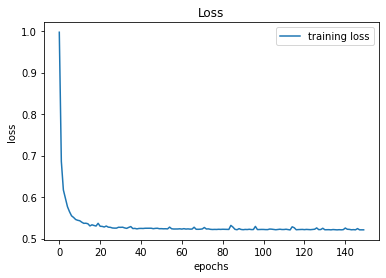

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [17]:
y_pred = ann.predict(X_test)
y_pred=np.round(y_pred)
np.set_printoptions(precision=2)
print(y_pred)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [19]:
print(y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(round(accuracy_score(y_test,y_pred)*100),2))

Accuracy Score for the algorithm=>53%
